Inspired by this tutorial: https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py

In [1]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable
from torchvision.utils import save_image

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4466),
                                     (0.247, 0.243, 0.261))])

trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(),
                    tv.transforms.Normalize((0.4914,0.4822, 0.4466),
                                            (0.247, 0.243, 0.261))])

trainset = tv.datasets.MNIST(root='./data',  train=True, download=True,
                             transform=transform)


dataloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                         shuffle=False, num_workers=4)

testset = tv.datasets.MNIST(root='./data', train=False, download=True,
                              transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [11]:
trainset.train_data

torch.Size([60000, 28, 28])

In [12]:
trainset.train_data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [2]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [36]:
# Training Paramaters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005

In [37]:
autoencoder = AutoEncoder()
autoencoder = autoencoder.cuda()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

In [26]:
for i, data in enumerate(dataloader, 0):
    if i == 0:
        print(data[1])
        print(data[0].shape)
        print(data[1].shape)

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])
torch.Size([32, 1, 28, 28])
torch.Size([32])


In [38]:
for epoch in range(EPOCH):
    
        running_loss = 0.0
        for i, data in enumerate(dataloader, 0):
            inputs, labels = data
            inputs = inputs.cuda()
            
            inputs = inputs.view(-1, 28*28)
            
            optimizer.zero_grad()
            
            outputs = autoencoder(inputs)
            loss = loss_func(outputs, inputs)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if i % 200 == 199:    # print every 200 mini-batches
                print('[%d, %5d] loss: %.6f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training!')

[1,   200] loss: 0.000487
[1,   400] loss: 0.000435
[1,   600] loss: 0.000479
[1,   800] loss: 0.000401
[1,  1000] loss: 0.000409
[1,  1200] loss: 0.000371
[1,  1400] loss: 0.000344
[1,  1600] loss: 0.000364
[1,  1800] loss: 0.000376
[2,   200] loss: 0.000332
[2,   400] loss: 0.000314
[2,   600] loss: 0.000361
[2,   800] loss: 0.000323
[2,  1000] loss: 0.000325
[2,  1200] loss: 0.000320
[2,  1400] loss: 0.000290
[2,  1600] loss: 0.000317
[2,  1800] loss: 0.000365
[3,   200] loss: 0.000301
[3,   400] loss: 0.000288
[3,   600] loss: 0.000327
[3,   800] loss: 0.000296
[3,  1000] loss: 0.000300
[3,  1200] loss: 0.000308
[3,  1400] loss: 0.000275
[3,  1600] loss: 0.000307
[3,  1800] loss: 0.000327
[4,   200] loss: 0.000282
[4,   400] loss: 0.000292
[4,   600] loss: 0.000309
[4,   800] loss: 0.000298
[4,  1000] loss: 0.000293
[4,  1200] loss: 0.000292
[4,  1400] loss: 0.000271
[4,  1600] loss: 0.000297
[4,  1800] loss: 0.000318
[5,   200] loss: 0.000277
[5,   400] loss: 0.000279
[5,   600] l

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


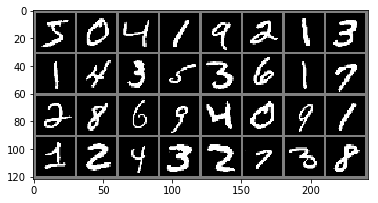

In [58]:
dataiter = iter(dataloader)
images, labels = dataiter.next()

# print images
images.shape
imshow(tv.utils.make_grid(images))
#print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]]
#                                for j in range(4)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


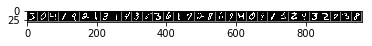

In [60]:
dataiter = iter(dataloader)
images, labels = dataiter.next()

# print images
images.shape
imshow(tv.utils.make_grid(images, nrow=32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


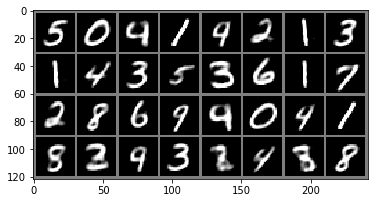

In [57]:
images = images.view(-1, 28*28)
images = images.cuda()
outputs = autoencoder(images)
outputs = outputs.cpu()
outputs = outputs.view(-1, 28, 28)
outputs = outputs.view(-1, 1, 28, 28)
outputs.shape
imshow(tv.utils.make_grid(outputs))

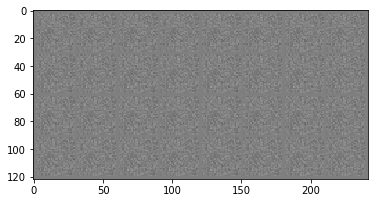

In [21]:
untrained = AutoEncoder()
untrained = untrained.cuda()

images = images.view(-1, 28*28)
images = images.cuda()
outputs = untrained(images)
outputs = outputs.cpu()
outputs = outputs.view(-1, 28, 28)
outputs = outputs.view(-1, 1, 28, 28)
outputs.shape
imshow(tv.utils.make_grid(outputs))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


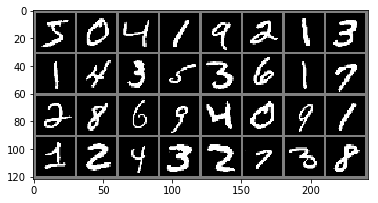

tensor([[-2.1495e+00,  7.0253e-02,  2.1295e+00],
        [ 1.9855e-02,  1.8730e+00,  1.0457e+00],
        [-5.5029e+00,  3.3092e+00, -1.5271e+01],
        [-3.2782e+01,  2.7329e-01,  2.0348e+01],
        [-7.9196e+00,  2.7043e+00, -4.2962e+00],
        [-1.4882e+01, -1.6633e+01,  1.5938e+01],
        [-2.3561e+01, -2.4570e+01, -6.2539e+00],
        [-2.8374e+00, -2.6913e+00,  3.3589e+00],
        [-2.5196e+01, -2.3791e+01, -3.3250e+00],
        [-9.8417e+00,  1.5350e+01,  3.4958e-01],
        [-1.6748e+00, -2.6807e+00,  1.7661e+00],
        [-1.0074e+01,  1.2751e+01,  1.3830e+01],
        [ 3.5307e-01, -4.9468e+00, -1.0342e+00],
        [-1.5145e+00,  3.5355e+00, -1.5720e+00],
        [-2.7308e+01, -2.4237e+01, -1.0127e+00],
        [-3.3481e+01,  2.8747e+01, -4.3281e+00],
        [-8.2098e+00, -1.3729e+01,  8.4721e+00],
        [-1.0555e+01,  1.6010e+00,  7.5778e+00],
        [-2.5614e+00,  1.3405e+00, -4.4140e-01],
        [-1.8820e+01,  6.9440e+00,  2.9812e+00],
        [-1.9339e+00

In [64]:
dataiter = iter(dataloader)
images, labels = dataiter.next()

# print images
images.shape
imshow(tv.utils.make_grid(images))

images = images.view(-1, 28*28)
images = images.cuda()

outputs = autoencoder.encoder(images)
outputs = outputs.cpu()
outputs

In [66]:
outputs[0]

tensor([-2.1495,  0.0703,  2.1295], grad_fn=<SelectBackward>)

In [68]:
import numpy as np

In [74]:
np.linalg.norm(outputs[0].data.numpy())

3.0265517

In [75]:
for i, a in enumerate(outputs):
    print(f'Norm of vector {i}: {np.linalg.norm(a.data.numpy())}')

Norm of vector 0: 3.0265517234802246
Norm of vector 1: 2.1452131271362305
Norm of vector 2: 16.5660343170166
Norm of vector 3: 38.58437728881836
Norm of vector 4: 9.406962394714355
Norm of vector 5: 27.425493240356445
Norm of vector 6: 34.61091995239258
Norm of vector 7: 5.155178070068359
Norm of vector 8: 34.811866760253906
Norm of vector 9: 18.23744010925293
Norm of vector 10: 3.62085223197937
Norm of vector 11: 21.33877182006836
Norm of vector 12: 5.066090106964111
Norm of vector 13: 4.155058860778809
Norm of vector 14: 36.52593994140625
Norm of vector 15: 44.34043502807617
Norm of vector 16: 18.101255416870117
Norm of vector 17: 13.092142105102539
Norm of vector 18: 2.924463987350464
Norm of vector 19: 20.280290603637695
Norm of vector 20: 10.594526290893555
Norm of vector 21: 2.1981770992279053
Norm of vector 22: 14.526735305786133
Norm of vector 23: 38.794036865234375
Norm of vector 24: 4.226053237915039
Norm of vector 25: 8.113931655883789
Norm of vector 26: 8.830864906311035
No

In [76]:
from scipy import spatial

for i, a in enumerate(outputs):
    print(f'Norm of v{i} from v0 is: {1-spatial.distance.cosine(a.data.numpy(), outputs[0].data.numpy())}')

Norm of v0 from v0 is: 1.0
Norm of v1 from v0 is: 0.35667678713798523
Norm of v2 from v0 is: -0.40805351734161377
Norm of v3 from v0 is: 0.9746179580688477
Norm of v4 from v0 is: 0.2832350730895996
Norm of v5 from v0 is: 0.7802078127861023
Norm of v6 from v0 is: 0.3398502469062805
Norm of v7 from v0 is: 0.8372135162353516
Norm of v8 from v0 is: 0.4309510290622711
Norm of v9 from v0 is: 0.4162777066230774
Norm of v10 from v0 is: 0.654513418674469
Norm of v11 from v0 is: 0.8051915168762207
Norm of v12 from v0 is: -0.21580292284488678
Norm of v13 from v0 is: 0.012416668236255646
Norm of v14 from v0 is: 0.4960496723651886
Norm of v15 from v0 is: 0.48262590169906616
Norm of v16 from v0 is: 0.6338276863098145
Norm of v17 from v0 is: 0.9826911091804504
Norm of v18 from v0 is: 0.5264742970466614
Norm of v19 from v0 is: 0.7704346179962158
Norm of v20 from v0 is: -0.5623404383659363
Norm of v21 from v0 is: 0.13100995123386383
Norm of v22 from v0 is: 0.6898186206817627
Norm of v23 from v0 is: 0.9

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

for i, a in enumerate(outputs):
    print(f'Norm of v{i} from v0 is: {cosine_similarity(a.data.numpy(), outputs[0].data.numpy())}')

ModuleNotFoundError: No module named 'metrics'

In [79]:
from fastai import *